<a href="https://colab.research.google.com/github/aldoxd82/proyectoDemoCursoPrework-test/blob/master/Copia_de_TaylorSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones expresadas como Series
#### Expansión en series de Taylor
Cualquier función racional puede ser evaluada por una serie de potencias, como la serie de Taylor, que se expresa como:

$$f(x)=f(a)+f'(a)(x-a)+f''(a)\frac{(x-a)^2}{2!}+f'''(a)\frac{(x-a)^3}{3!}+ f^{n}(a)\frac{(x-a)^{n}}{n!}$$
O de manera general:

$$f(x)=\sum_{n=0}^{\infty} \frac{f^{(n)}(a)(x-a)}{n!} $$
A continuación se desarrolla un pequeño programa que calcula la expansión en series de Taylor de una función racional


## Cálculo simbólico con sympy
Una primera aproximación al método de series de Taylor nos permitirá ilustrar algunas funciones simbólicas de Sympy.

In [ ]:
from sympy import *
import matplotlib.pyplot as plt

order=0
x = symbols('x')
if (order==0):
    series=diff(exp(x), x, 1)
    print("La aproximación de orden " + str(order) + " es: " + str(series.subs(x,0)))  
    print("La expansión de orden " + str(order) + " es: " + str(series)) 
else: print("Nunca había llegado tan lejos")
    

La aproximación de orden 0 es: 1
La expansión de orden 0 es: exp(x)


## Una segunda iteración
Avanzaremos un poco más, modificando el método para calcular el término de n-ésimo orden. Utilizaremos un bucle for y guardaremos los términos calculados en una lista

In [ ]:
from sympy import *
import matplotlib.pyplot as plt

x_0=0
order=2
h=1
x = symbols('x')
approx=[]
series=0
seriesTxt=[]
for n in range(order+1): 
    differential=diff(exp(x), x, n)
    approx.append(((differential.subs(x,x_0))*(h**(n)))/(factorial(n)))   
    seriesTxt.append("("+str(differential.subs(x,x_0)) + "*(x-"+ str(x_0)+")**" + str(n)+")"+"/"+
                     "factorial(" +str(n)+")")
print("Terminos:" + str(approx))
print("Aproximación: "+ str(sum(approx).evalf()))
print(seriesTxt)

Terminos:[1, 1, 1/2]
Aproximación: 2.50000000000000
['(1*(x-0)**0)/factorial(0)', '(1*(x-0)**1)/factorial(1)', '(1*(x-0)**2)/factorial(2)']


## Un ejemplo de transformación de un objeto cadena a un objeto Sympy.
Por comodidad, a veces, es necesario tomar una cadena y enviarla a un método para su posterior tratamiento, la transformación de una cadena a un objeto que Sympy pueda reconocer se hace a través del método sympify()

In [ ]:
from sympy import *
import matplotlib.pyplot as plt

x_0=0
order=4
h=1
x = symbols('x')
approx=[]
series=0
seriesTxt=[]
f="-0.1*x**4-0.15*x**3-0.5*x**2-0.25*x+1.2"
sympify(f)
for n in range(order+1): 
    differential=diff(f, x, n)
    approx.append(((differential.subs(x,x_0))*(h**(n)))/(factorial(n)))   
    seriesTxt.append("("+str(differential.subs(x,x_0)) + "*h**" + str(n)+")"+"/"+
                     "factorial(" +str(n)+")")
print("Terminos:" + str(approx))
print("Aproximación: "+ str(sum(approx).evalf()))
print(seriesTxt)

Terminos:[1.20000000000000, -0.250000000000000, -0.500000000000000, -0.150000000000000, -0.100000000000000]
Aproximación: 0.200000000000000
['(1.20000000000000*h**0)/factorial(0)', '(-0.250000000000000*h**1)/factorial(1)', '(-1.00000000000000*h**2)/factorial(2)', '(-0.900000000000000*h**3)/factorial(3)', '(-2.40000000000000*h**4)/factorial(4)']


## El siguiente paso será graficar el polinomio que aproxima a la función deseada.

Para esto necesitaremos hacer uso de la biblioteca matplotlib

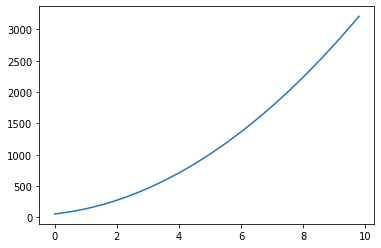

terms: ['+(exp(4)*h**0)/factorial(0)', '+(exp(4)*h**1)/factorial(1)', '+(exp(4)*h**2)/factorial(2)']
Serie cadena: h**2*exp(4)/2 + h*exp(4) + exp(4)
Aproximación: 27.2990750165721*h**2 + 54.5981500331442*h + 54.5981500331442
Aproximaciones: [exp(4), h*exp(4), h**2*exp(4)/2]


In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

x_0=0
order=2
h=1
x,h= symbols('x h')
approx=[]
terms=[]
f=sympify("exp(x)")

for n in range(order+1): 
    differential=diff(f, x, n)
    approx.append(((differential.subs(x,x_0))*(h**(n)))/(factorial(n)))   
    terms.append("+("+str(differential.subs(x,x_0)) + "*h**" + str(n)+")"+"/"+
                     "factorial(" +str(n)+")")
        
serieTxt=sympify(''.join(terms))

def funcion(fun,var,val):
    return fun.subs(var,val)

x1 = np.arange(0, 10, 0.2)
y = [funcion(serieTxt,h,n) for n in x1]
plt.plot(x1, y)
plt.show()

print("terms: " + str(terms))
print("Serie cadena: " + str(serieTxt))
print("Aproximación: "+ str(sum(approx).evalf()))
print("Aproximaciones: " + str(approx))





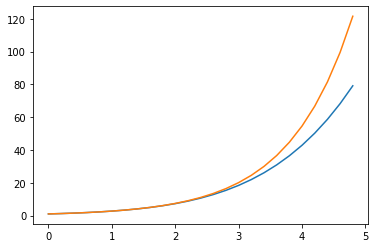

Serie cadena: h**5/120 + h**4/24 + h**3/6 + h**2/2 + h + 1
Aproximación: 0.00833333333333333*h**5 + 0.0416666666666667*h**4 + 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6, h**4/24, h**5/120]


In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

x_0=0
order=5
h=1
x,h= symbols('x h')
approx=[]
terms=[]

f=sympify("exp(x)")

def funcion(fun,var,val):
    return fun.subs(var,val)

for n in range(order+1): 
    differential=diff(f, x, n)
    approx.append(((differential.subs(x,x_0))*(h**(n)))/(factorial(n)))   
    terms.append("+("+str(differential.subs(x,x_0)) + "*h**" + str(n)+")"+"/"+
                     "factorial(" +str(n)+")")

serieTxt=sympify(''.join(terms))

x1 = np.arange(0, 5, 0.2)
y = [funcion(serieTxt,h,n) for n in x1]
plt.plot(x1, y,x1, np.exp(x1))
plt.show()



print("Serie cadena: " + str(serieTxt))
print("Aproximación: "+ str(sum(approx).evalf()))
print("Aproximaciones: " + str(approx))

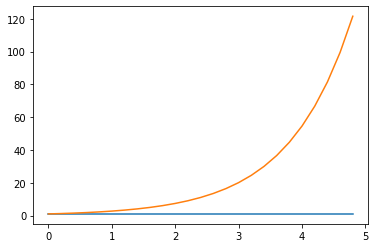

Serie cadena: [1]
Aproximación: 1.00000000000000
Aproximaciones: [1]


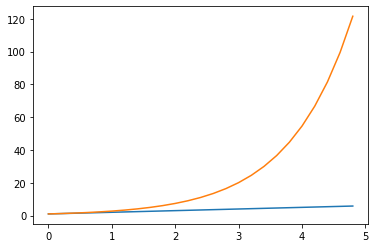

Serie cadena: [1, h]
Aproximación: h + 1.0
Aproximaciones: [1, h]


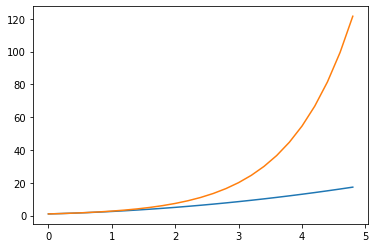

Serie cadena: [1, h, h**2/2]
Aproximación: 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2]


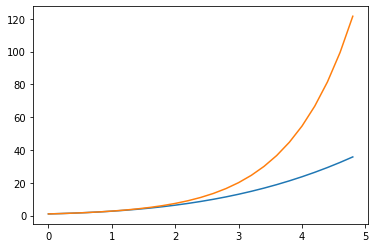

Serie cadena: [1, h, h**2/2, h**3/6]
Aproximación: 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6]


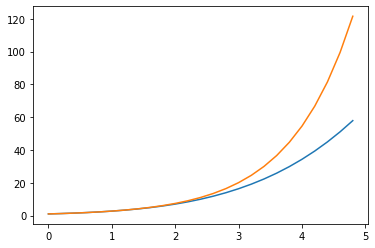

Serie cadena: [1, h, h**2/2, h**3/6, h**4/24]
Aproximación: 0.0416666666666667*h**4 + 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6, h**4/24]


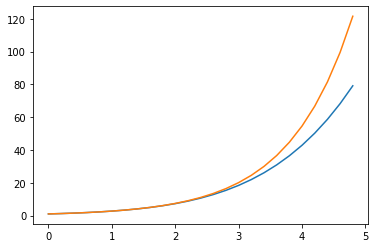

Serie cadena: [1, h, h**2/2, h**3/6, h**4/24, h**5/120]
Aproximación: 0.00833333333333333*h**5 + 0.0416666666666667*h**4 + 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6, h**4/24, h**5/120]


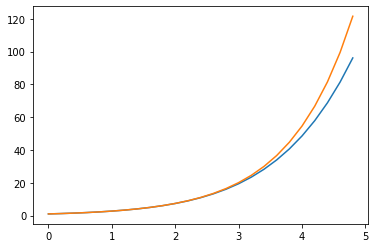

Serie cadena: [1, h, h**2/2, h**3/6, h**4/24, h**5/120, h**6/720]
Aproximación: 0.00138888888888889*h**6 + 0.00833333333333333*h**5 + 0.0416666666666667*h**4 + 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6, h**4/24, h**5/120, h**6/720]


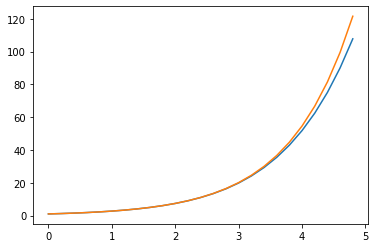

Serie cadena: [1, h, h**2/2, h**3/6, h**4/24, h**5/120, h**6/720, h**7/5040]
Aproximación: 0.000198412698412698*h**7 + 0.00138888888888889*h**6 + 0.00833333333333333*h**5 + 0.0416666666666667*h**4 + 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6, h**4/24, h**5/120, h**6/720, h**7/5040]


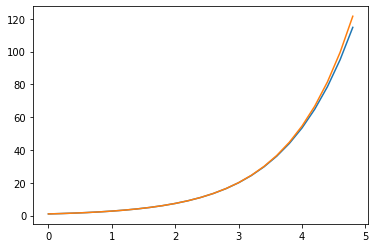

Serie cadena: [1, h, h**2/2, h**3/6, h**4/24, h**5/120, h**6/720, h**7/5040, h**8/40320]
Aproximación: 2.48015873015873e-5*h**8 + 0.000198412698412698*h**7 + 0.00138888888888889*h**6 + 0.00833333333333333*h**5 + 0.0416666666666667*h**4 + 0.166666666666667*h**3 + 0.5*h**2 + h + 1.0
Aproximaciones: [1, h, h**2/2, h**3/6, h**4/24, h**5/120, h**6/720, h**7/5040, h**8/40320]


In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

x_0=0
order=8
h=4
x,h= symbols('x h')
approx=[]
terms=[]

f=sympify("exp(x)")
x1 = np.arange(0, 5, 0.2)

for n in range(order+1): 
    differential=diff(f, x, n)
    approx.append(((differential.subs(x,x_0))*(h**(n)))/(factorial(n)))   
    terms.append("+("+str(differential.subs(x,x_0)) + "*h**" + str(n)+")"+"/"+
                     "factorial(" +str(n)+")")
    
    y = [funcion(sympify(''.join(terms)),h,n) for n in x1]
    plt.plot(x1, y,x1, np.exp(x1))
    plt.show()
    print("Serie cadena: " + str(sympify(terms)))  
    print("Aproximación: "+ str(sum(approx).evalf()))
    print("Aproximaciones: " + str(approx))

def funcion(fun,var,val):
    return fun.subs(var,val)



los valores de x son: [0 1 2 3 4 5]
los valores de y son: [1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766]


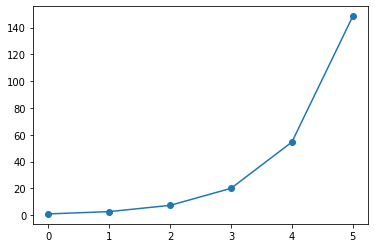

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math


x=np.arange(0, 6, 1)
y=[]

for i in range(len(x)):
    y.append(math.exp(i))   #El método append() agrega un elemento en la posición final de la lista

print("los valores de x son: "+str(x))
print("los valores de y son: "+str(y))

plt.plot(x,y,"o-")       #Con este comando graficamos, tomando primero una lista con los valores de x
                    #y otra lista con los valores de y
plt.show()


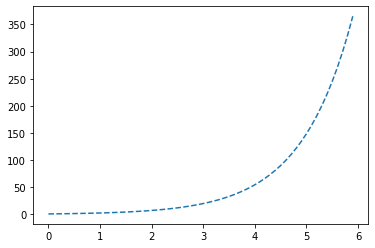

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.arange(0, 6, 0.1)

plt.plot(x,np.exp(x),"--")       #Con este comando graficamos, tomando primero una lista con los valores de x
                    #y otra lista con los valores de y
plt.show()